# p-shockwave determine
p-shock wave starts from $q_l$ or $q_r$ should be tangent at the point $q_l$ with p-rarefaction wave, and the valid parts are in the oppsite direction of those of corresponding rarefaction wave. So after obtaining $H(q_l)$ or $H(q_r)$ by Rankine-Hugoniot condition, we can determine p-shock wave as well as the valid parts.

[2.]
[0.47247477]
0.47247476834805324


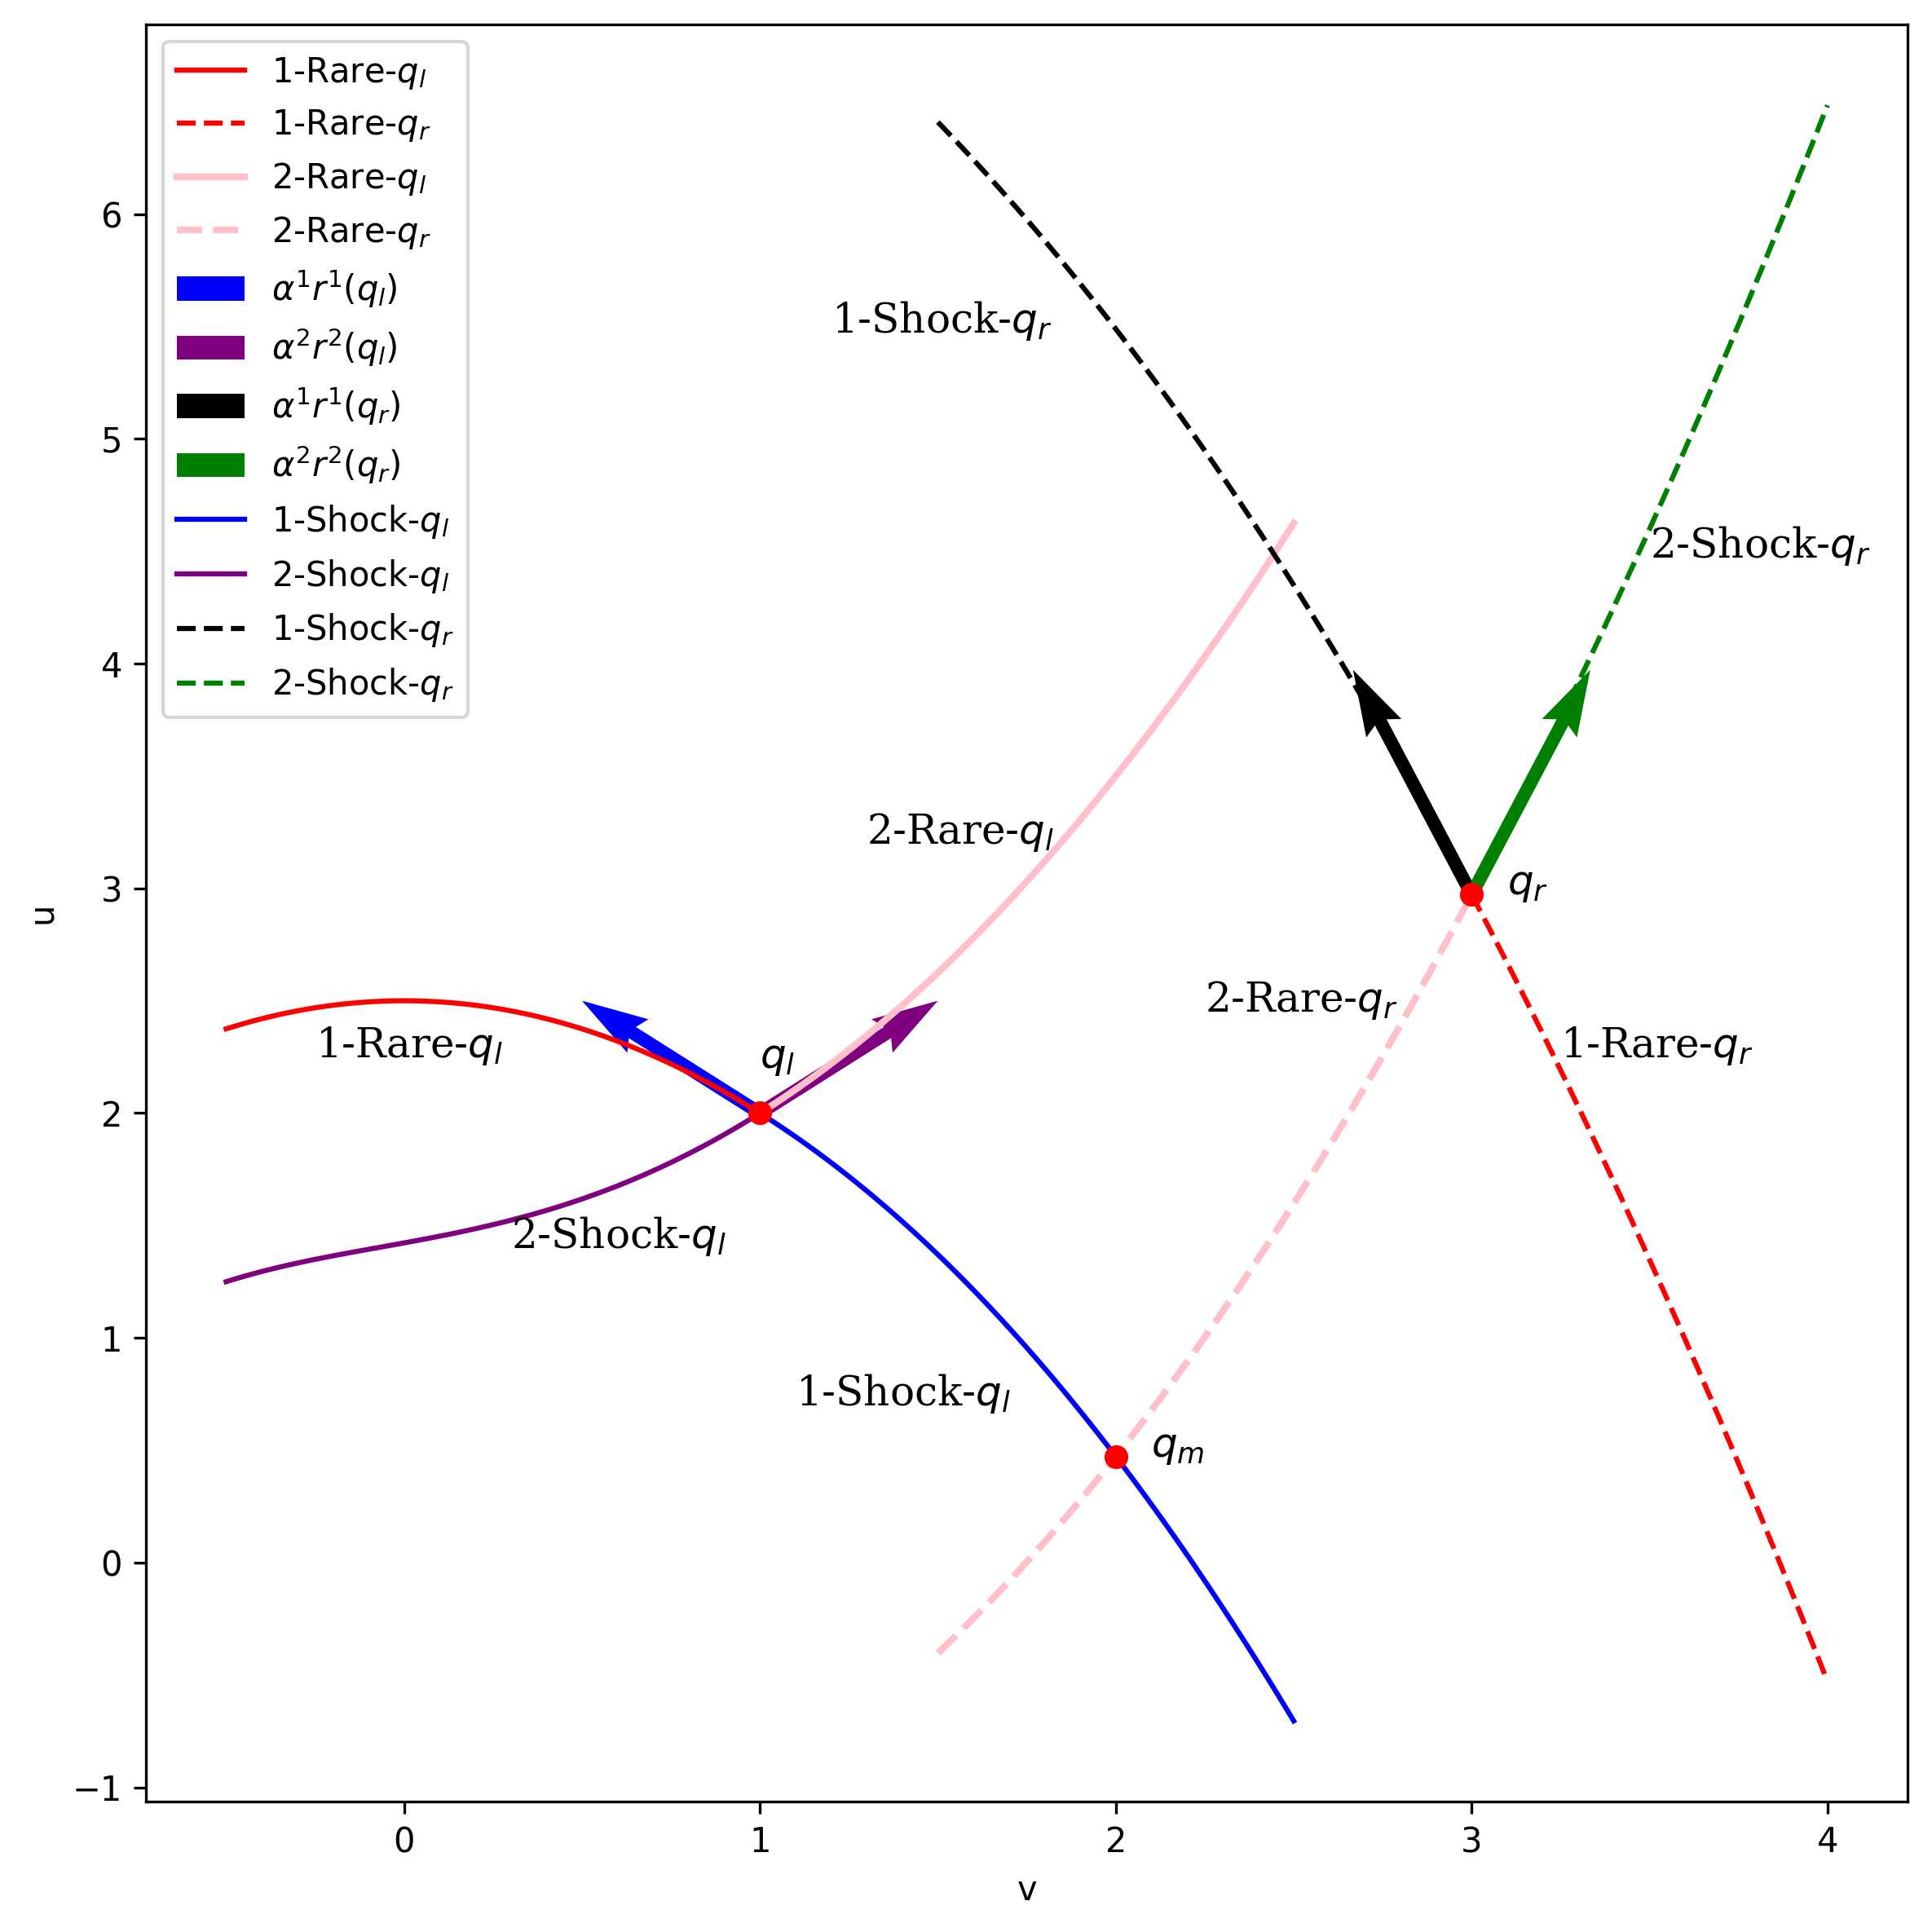

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_family('serif')
# create a grid of points
x = np.linspace(-0.5, 4, 100)
x1 = np.linspace(-0.5, 1, 100)
x2 = np.linspace(1, 2.5, 100)
x3 = np.linspace(1.5, 3, 100)
x4 = np.linspace(3, 4.0, 100)
x4_ = np.linspace(3, 3.5, 100)
plt.figure(figsize=(8, 8), dpi=300)
#plt.pcolor(X, Y, V, cmap='RdBu')
#plt.colorbar()
#plt.quiver(X, Y, U, V)


def r1l(y):
    return -0.5*y**2+2.5 
def r1r(y):
    return -0.5*y**2+9-np.sqrt(7/3)

def r2l(y):
    return 0.5*y**2+1.5
def r2r(y):
    return 0.5*y**2-np.sqrt(7/3)

def h1l(y):
    return 2-np.sqrt(1/3*(y**3-1**3)*(y-1))
def h2l(y):
    return 2+np.sqrt(1/3*(y**3-1**3)*(y-1))

def h1r(y):
    return 9/2-np.sqrt(7/3)-np.sqrt(1/3*(y**3-3**3)*(y-3))
def h2r(y):
    return 9/2-np.sqrt(7/3)+np.sqrt(1/3*(y**3-3**3)*(y-3))

ql = np.array([1,2])
qr = np.array([3,9/2-np.sqrt(7/3)])

#plot the curves
plt.plot(x1, r1l(x1), color='red',label='1-Rare-$q_l$')
plt.text(-0.25, 2.25, '1-Rare-$q_l$', fontsize=12, fontproperties=font)
plt.plot(x4, r1r(x4), color='red',linestyle='--',label='1-Rare-$q_r$')
plt.text(3.25, 2.25, '1-Rare-$q_r$', fontsize=12, fontproperties=font)

plt.plot(x2, r2l(x2), color='pink', linewidth=2, label='2-Rare-$q_l$')
plt.text(1.3, 3.2, '2-Rare-$q_l$', fontsize=12, fontproperties=font)
plt.plot(x3, r2r(x3), color='pink',linestyle='--', linewidth=2, label='2-Rare-$q_r$')
plt.text(2.25, 2.45, '2-Rare-$q_r$', fontsize=12, fontproperties=font)

#plot the arrow by quiver 
plt.quiver(1, h1l(1), -1, 1 , angles='xy', scale_units='xy', scale=2, label='$\\alpha^1 r^1(q_l)$', color='blue')
plt.text(1+0.1, h1l(1)-1.3, '1-Shock-$q_l$', fontsize=12, fontproperties=font)
plt.quiver(1, h1l(1), 1, 1 , angles='xy', scale_units='xy', scale=2, label='$\\alpha^2 r^2(q_l)$', color='purple')
plt.text(1-0.7, h1l(1)-0.6, '2-Shock-$q_l$', fontsize=12, fontproperties=font)
plt.quiver(3, h2r(3), -1, 3 , angles='xy', scale_units='xy', scale=3, label='$\\alpha^1 r^1(q_r)$', color='black')
plt.text(3-1.8, h2r(3)+2.5, '1-Shock-$q_r$', fontsize=12, fontproperties=font)
plt.quiver(3, h2r(3), 1, 3 , angles='xy', scale_units='xy', scale=3, label='$\\alpha^2 r^2(q_r)$', color='green')
plt.text(3+0.5, h2r(3)+1.5, '2-Shock-$q_r$', fontsize=12, fontproperties=font)


plt.plot(x2, h1l(x2), color='blue', label='1-Shock-$q_l$')
plt.plot(x1, h1l(x1), color='purple', label='2-Shock-$q_l$')
plt.plot(x3, h2r(x3), color='black', linestyle='--', label='1-Shock-$q_r$')
plt.plot(x4, h2r(x4), color='green', linestyle='--', label='2-Shock-$q_r$')


plt.plot(ql[0], ql[1], 'ro')
plt.plot(qr[0], qr[1], 'ro')


plt.text(ql[0], ql[1]+0.2, '$q_l$', fontsize=12, fontproperties=font)
plt.text(qr[0]+0.1, qr[1], '$q_r$', fontsize=12, fontproperties=font)
plt.xlabel('v')
plt.ylabel('u')


#solve the intersection of h1l and r2r
from scipy.optimize import fsolve
def f(x):
    return h1l(x)-r2r(x)

x0 = fsolve(f, 1.0)#2.0 is the initial guess
print(x0)
print(h1l(x0))
print(2-np.sqrt(7/3))
plt.plot(x0, h1l(x0), 'ro')

plt.legend()

plt.text(x0+0.1, h1l(x0), '$q_m$', fontsize=12, fontproperties=font)
plt.tight_layout()
plt.savefig('rarefaction_shock.png', bbox_inches='tight')
plt.show()